In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_lebron = pd.read_csv('Data/1_lebron_james_shot_chart_1_2023.csv')
df_harden = pd.read_csv('Data/2_james_harden_shot_chart_2023.csv')
df_curry = pd.read_csv('Data/3_stephen_curry_shot_chart_2023.csv')

In [3]:
print(df_lebron.dtypes)

top                     int64
left                    int64
date                   object
qtr                    object
time_remaining         object
result                   bool
shot_type               int64
distance_ft             int64
lead                     bool
lebron_team_score       int64
opponent_team_score     int64
opponent               object
team                   object
season                  int64
color                  object
dtype: object


In [4]:
print(df_lebron.describe())

               top         left    shot_type  distance_ft  lebron_team_score  \
count  1533.000000  1533.000000  1533.000000  1533.000000        1533.000000   
mean    151.410959   231.982387     2.318982    12.960861          59.813438   
std      98.316684    91.626122     0.466234    10.698687          35.376109   
min      36.000000     2.000000     2.000000     0.000000           0.000000   
25%      67.000000   193.000000     2.000000     3.000000          31.000000   
50%      98.000000   238.000000     2.000000    10.000000          60.000000   
75%     251.000000   261.000000     3.000000    25.000000          88.000000   
max     389.000000   478.000000     3.000000    34.000000         140.000000   

       opponent_team_score  season  
count          1533.000000  1533.0  
mean             59.098500  2023.0  
std              35.456701     0.0  
min               0.000000  2023.0  
25%              31.000000  2023.0  
50%              59.000000  2023.0  
75%              88.

In [5]:
print(df_harden.describe())

               top         left    shot_type  distance_ft  lebron_team_score  \
count  1025.000000  1025.000000  1025.000000  1025.000000        1025.000000   
mean    187.128780   263.727805     2.486829    16.507317          56.415610   
std     100.476856    96.539798     0.500070    10.589748          33.629167   
min      31.000000    -3.000000     2.000000     0.000000           0.000000   
25%      83.000000   216.000000     2.000000     5.000000          29.000000   
50%     180.000000   243.000000     2.000000    19.000000          55.000000   
75%     292.000000   328.000000     3.000000    26.000000          83.000000   
max     368.000000   481.000000     3.000000    32.000000         135.000000   

       opponent_team_score  season  
count          1025.000000  1025.0  
mean             55.072195  2023.0  
std              33.086987     0.0  
min               0.000000  2023.0  
25%              28.000000  2023.0  
50%              54.000000  2023.0  
75%              83.

In [6]:
print(df_curry.describe())

               top         left    shot_type  distance_ft  lebron_team_score  \
count  1434.000000  1434.000000  1434.000000  1434.000000        1434.000000   
mean    191.847280   246.480474     2.548117    18.411437          63.510460   
std     101.700886   120.059755     0.497853    10.367741          34.686879   
min      26.000000    -3.000000     2.000000     0.000000           0.000000   
25%      80.000000   172.000000     2.000000     6.000000          34.000000   
50%     208.000000   249.000000     3.000000    24.000000          65.500000   
75%     287.000000   328.000000     3.000000    27.000000          93.000000   
max     388.000000   483.000000     3.000000    36.000000         128.000000   

       opponent_team_score  season  
count          1434.000000  1434.0  
mean             62.246165  2023.0  
std              34.981942     0.0  
min               0.000000  2023.0  
25%              34.250000  2023.0  
50%              63.000000  2023.0  
75%              91.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

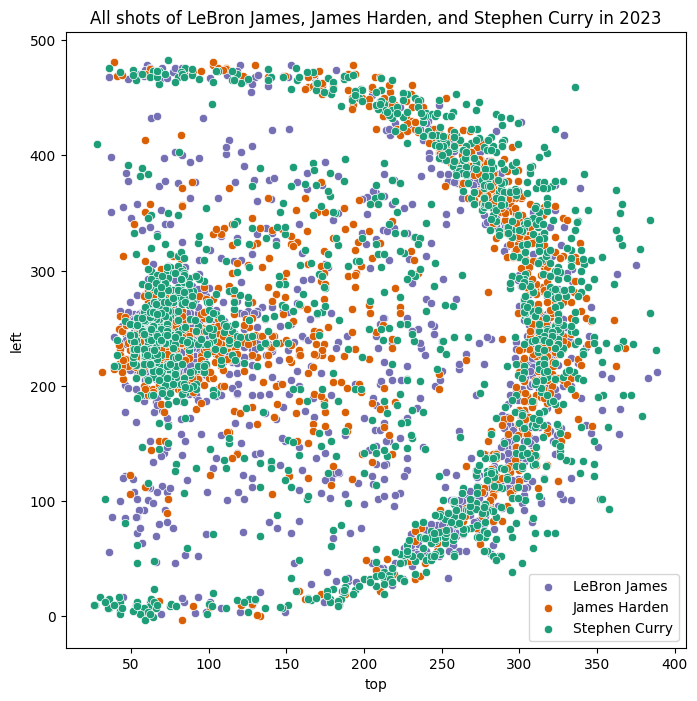

In [7]:
#create a heatmap to show the shot distribution of Lebron James
plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df_lebron, color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df_harden, color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df_curry, color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

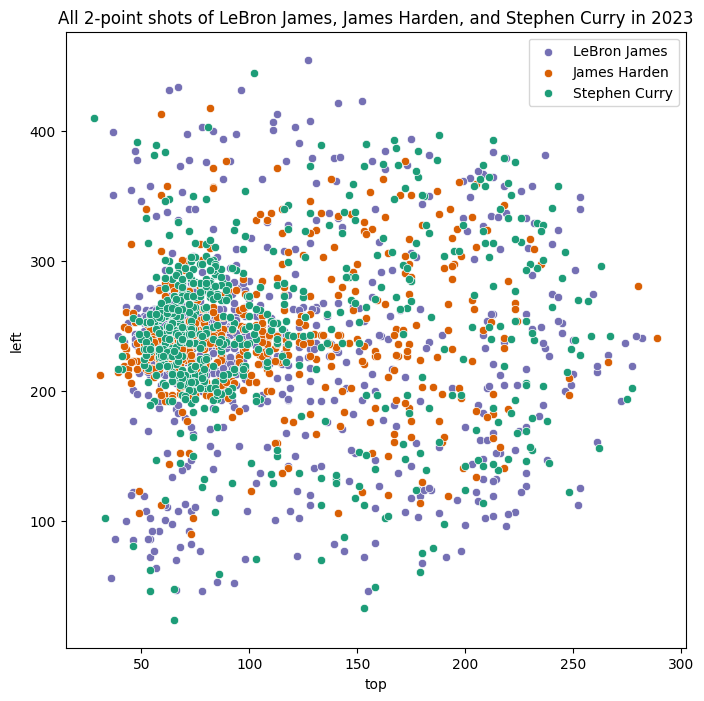

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df_lebron[df_lebron['shot_type'] == 2], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df_harden[df_harden['shot_type'] ==2 ], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df_curry[df_curry['shot_type'] == 2 ], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All 2-point shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

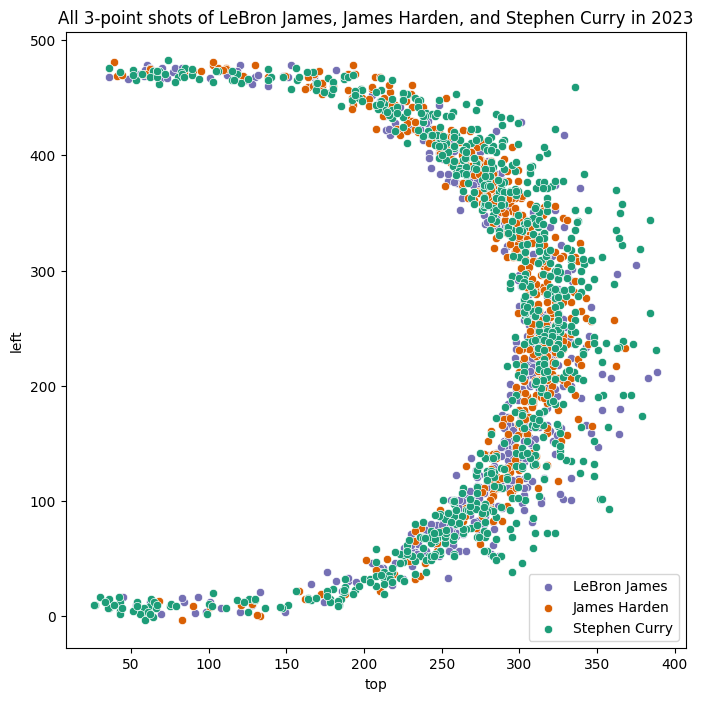

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df_lebron[df_lebron['shot_type'] == 3], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df_harden[df_harden['shot_type'] ==3 ], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df_curry[df_curry['shot_type'] == 3 ], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All 3-point shots of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

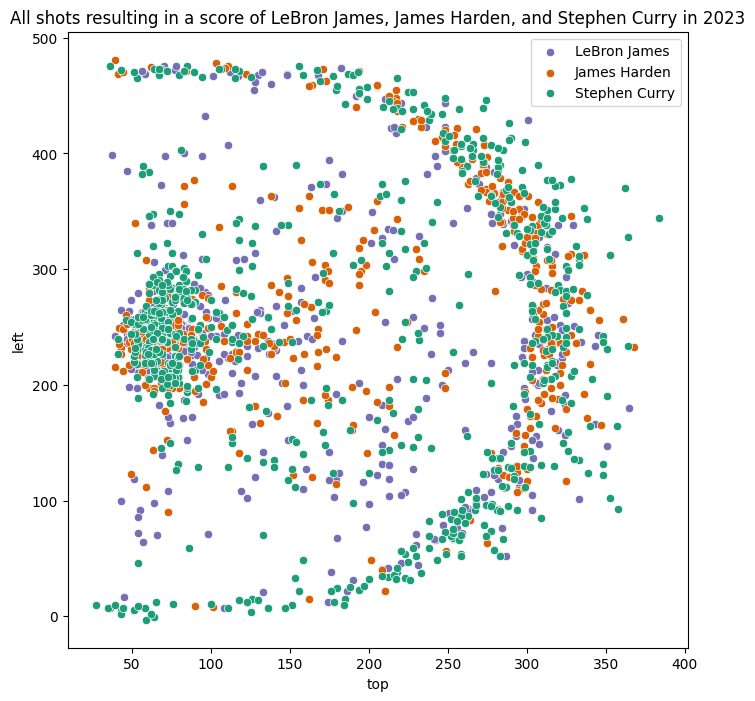

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(x='top', y='left', data=df_lebron[df_lebron['result']], color='#7570b4', label='LeBron James')
sns.scatterplot(x='top', y='left', data=df_harden[df_harden['result'] ], color='#d96004', label='James Harden')
sns.scatterplot(x='top', y='left', data=df_curry[df_curry['result'] ], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('All shots resulting in a score of LeBron James, James Harden, and Stephen Curry in 2023')
plt.show()

In [11]:
df_lebron['angle'] = np.degrees(np.arctan2(df_lebron['left'], df_lebron['top']))
df_lebron['angle'] = np.where(df_lebron['left'] > 250, df_lebron['angle'], -df_lebron['angle'])

df_harden['angle'] = np.degrees(np.arctan2(df_harden['left'], df_harden['top']))
df_harden['angle'] = np.where(df_harden['left'] > 250, df_harden['angle'], -df_harden['angle'])

df_curry['angle'] = np.degrees(np.arctan2(df_curry['left'], df_curry['top']))
df_curry['angle'] = np.where(df_curry['left'] > 250, df_curry['angle'], -df_curry['angle'])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


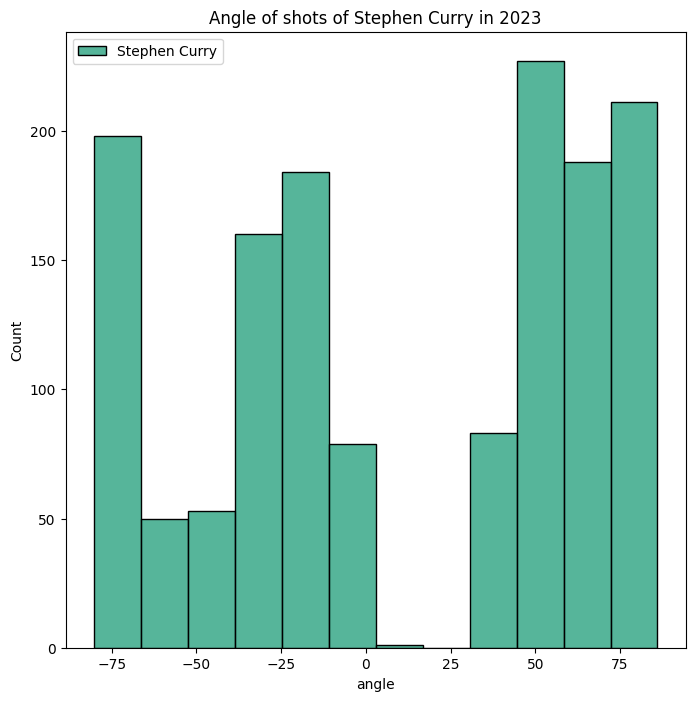

In [12]:
plt.figure(figsize=(8, 8))
sns.histplot(df_curry['angle'], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('Angle of shots of Stephen Curry in 2023')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


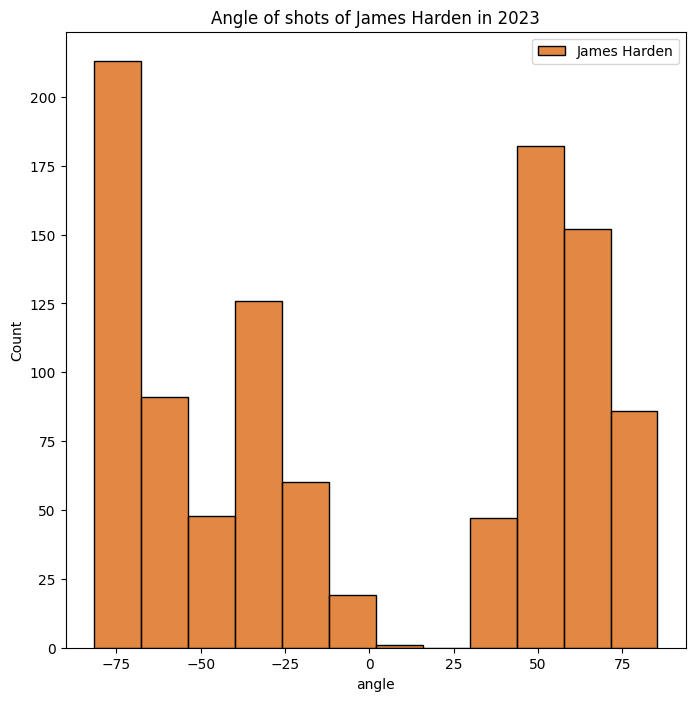

In [13]:
plt.figure(figsize=(8, 8))
sns.histplot(df_harden['angle'], color='#d96004', label='James Harden')
plt.legend()
plt.title('Angle of shots of James Harden in 2023')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


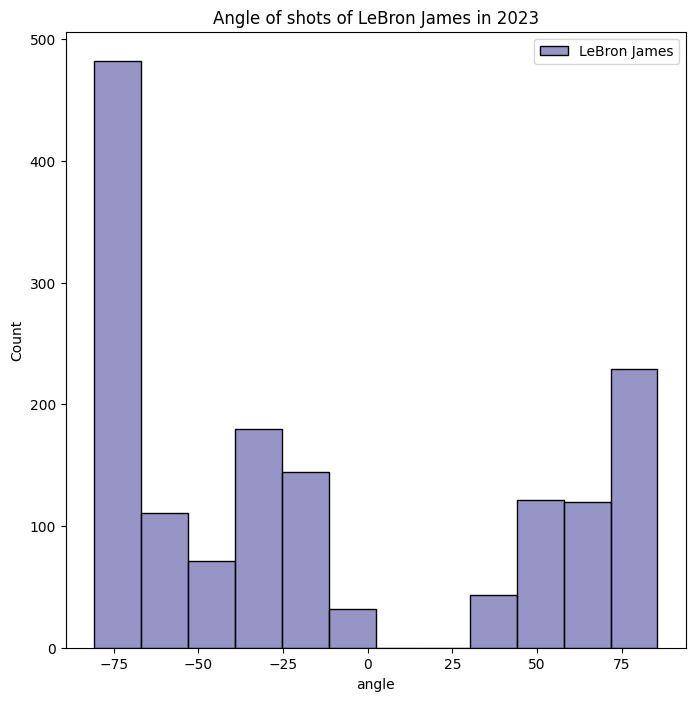

In [14]:
plt.figure(figsize=(8, 8))
sns.histplot(df_lebron['angle'], color='#7570b4', label='LeBron James')
plt.legend()
plt.title('Angle of shots of LeBron James in 2023')
plt.show()

In [15]:

df_lebron['distance'] = np.sqrt(df_lebron['top']**2 + (df_lebron['left'] - 250)**2)
df_harden['distance'] = np.sqrt(df_harden['top']**2 + (df_harden['left'] - 250)**2)
df_curry['distance'] = np.sqrt(df_curry['top']**2 + (df_curry['left'] - 250)**2)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


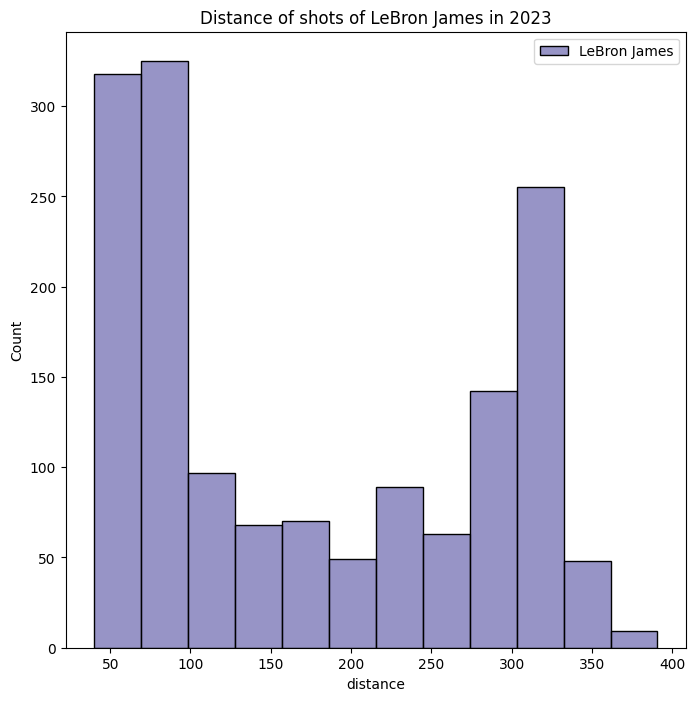

In [16]:

plt.figure(figsize=(8, 8))
sns.histplot(df_lebron['distance'], color='#7570b4', label='LeBron James')
plt.legend()
plt.title('Distance of shots of LeBron James in 2023')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


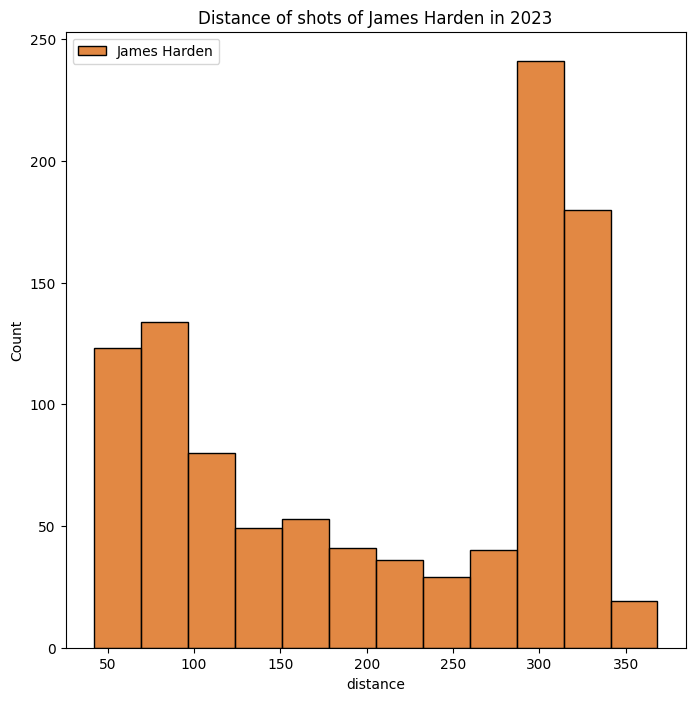

In [17]:
plt.figure(figsize=(8, 8))
sns.histplot(df_harden['distance'], color='#d96004', label='James Harden')
plt.legend()
plt.title('Distance of shots of James Harden in 2023')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


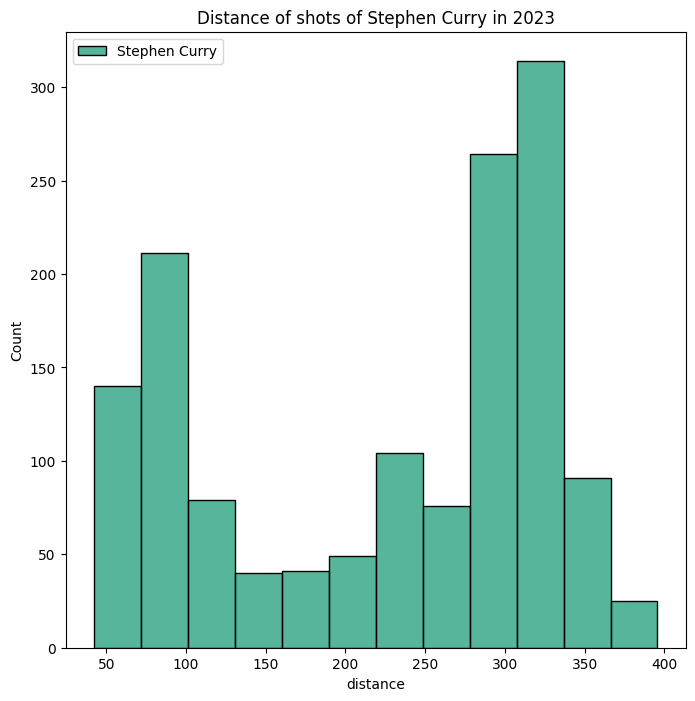

In [18]:
plt.figure(figsize=(8, 8))
sns.histplot(df_curry['distance'], color='#1d9d78', label='Stephen Curry')
plt.legend()
plt.title('Distance of shots of Stephen Curry in 2023')
plt.show()